# Regression model with regularization 
## Housing Sale Price

#### Problem Statement: 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

    - Which variables are significant in predicting the price of a house, and

    - How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 
Business Goal: 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Step 1: Reading and Understanding the Data

Let us first import required packages

In [2358]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2359]:
original_Df = pd.read_csv("train.csv")
updated_Df = original_Df
updated_Df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2360]:
updated_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2361]:
updated_Df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2362]:
updated_Df.shape

(1460, 81)

In [2363]:
#Remove Id column as it is just the identity column for the table
updated_Df.drop(['Id'], axis = 1, inplace = True)

### Update values in the categorical columns with meaningful names as per dictionary wherever required as we will be creating columns with these categorical values. We will also be shrinking the values to small whereever required:

In [2364]:
#Here for MSSubClass i am shortening the values provided in the dictionary:
#         20	1-STORY 1946 & NEWER ALL STYLES:==>1S1946NewAllStyle
#         30	1-STORY 1945 & OLDER:==> 1S1945Old
#         40	1-STORY W/FINISHED ATTIC ALL AGES:==>1SWFiATTICAllAGE
#         45	1-1/2 STORY - UNFINISHED ALL AGES:==>1to1halfSUfAllAGE
#         50	1-1/2 STORY FINISHED ALL AGES:==>1to1halfSFiAllAGE
#         60	2-STORY 1946 & NEWER:==>2S1946New
#         70	2-STORY 1945 & OLDER:==>2S1945Old
#         75	2-1/2 STORY ALL AGES:==>2to1halfSAllAGE
#         80	SPLIT OR MULTI-LEVEL:==>SplitOrMultiLevel
#         85	SPLIT FOYER:==>SplitFOYER
#         90	DUPLEX - ALL STYLES AND AGES:==>DuAllStyleNAge
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER:==>1SPUD1946
#        150	1-1/2 STORY PUD - ALL AGES:==>1to1halfSPUDAllAGE
#        160	2-STORY PUD - 1946 & NEWER:==>2SPUD1946
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER:==>PUDMultiInclSplitLevFOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES:==>2FamilyConversnAllStyleNAge
ColumnName = 'MSSubClass'
MSSubClass_replacement_dict = {20: '1S1946NewAllStyle', 30: '1S1945Old',40: '1SWFiATTICAllAGE',45: '1to1halfSUfAllAGE',50: '1to1halfSFiAllAGE',60: '2S1946New',70: '2S1945Old',75: '2to1halfSAllAGE',80: 'SplitOrMultiLevel',85: 'SplitFOYER',90: 'DuAllStyleNAge',120: '1SPUD1946',150: '1to1halfSPUDAllAGE',160: '2SPUD1946',180: 'PUDMultiInclSplitLevFOYER',190: '2FamilyConversnAllStyleNAge'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(MSSubClass_replacement_dict)


In [2365]:
#For MSZoning, shrinking the values to small whereever required
ColumnName = 'MSZoning'
MSZoning_replacement_dict = {'A': 'Agriculture','C': 'Commercial','FV': 'FloatVillageResi','I': 'Industrial','RH': 'ResiHighDens','RL': 'ResiLowDens','RP': 'ResiLowDensiPark','RM': 'ResiMedDens'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(MSZoning_replacement_dict)


In [2366]:
#For Street, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'Street'
Street_replacement_dict = {'Grvl': 'Gravel_Street','Pave': 'Paved_Street'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Street_replacement_dict)


In [2367]:
#For Alley, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'Alley'
Alley_replacement_dict = {'Grvl': 'Gravel_Alley','Pave': 'Paved_Alley', 'NA': 'NoAlleyAccess'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoAlleyAccess')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Alley_replacement_dict)

In [2368]:
#For LandSlope
ColumnName = 'LandSlope'
LandSlope_replacement_dict = {'Gtl': 'GentleSlope','Mod': 'ModerateSlope', 'Sev': 'SevereSlope'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(LandSlope_replacement_dict)

In [2369]:
#For Condition1, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'Condition1'
Condition1_replacement_dict = {'Artery': 'Artery_Condition1','Feedr': 'Feedr_Condition1', 'Norm': 'Norm_Condition1','RRNn': 'RRNn_Condition1','RRAn': 'RRAn_Condition1', 'PosN': 'PosN_Condition1','PosA': 'PosA_Condition1','RRNe': 'RRNe_Condition1', 'RRAe': 'RRAe_Condition1'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Condition1_replacement_dict)

In [2370]:
#For Condition2, we replace the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'Condition2'
Condition2_replacement_dict = {'Artery': 'Artery_Condition2','Feedr': 'Feedr_Condition2', 'Norm': 'Norm_Condition2','RRNn': 'RRNn_Condition2','RRAn': 'RRAn_Condition2', 'PosN': 'PosN_Condition2','PosA': 'PosA_Condition2','RRNe': 'RRNe_Condition2', 'RRAe': 'RRAe_Condition2'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Condition2_replacement_dict)

In [2371]:
# For HouseStyle, Here we replace only those values wchich have a '.'
ColumnName = 'HouseStyle'
HouseStyle_replacement_dict = {'1.5Fin': '15Fin', '1.5Unf': '15Unf','2.5Fin': '25Fin', '2.5Unf': '25Unf'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(HouseStyle_replacement_dict)

In [2372]:
# For OverallQual, Here we will replace and append with _columnname
#       10	Very Excellent:==> VeryExcellent_OverallQual
#        9	Excellent:==> Excellent_OverallQual
#        8	Very Good:==>VeryGood_OverallQual
#        7	Good:==>Good_OverallQual
#        6	Above Average:==>AboveAvg_OverallQual
#        5	Average:==> Average_OverallQual
#        4	Below Average:==>BelowAvg_OverallQual
#        3	Fair:==>Fair_OverallQual
#        2	Poor:==>Poor_OverallQual
#        1	Very Poor:==>VeryPoor_OverallQual
ColumnName = 'OverallQual'
OverallQual_replacement_dict = {1: 'VeryPoor_OverallQual', 2: 'Poor_OverallQual',3: 'Fair_OverallQual', 4: 'BelowAvg_OverallQual', 5: 'Average_OverallQual', 6: 'AboveAvg_OverallQual', 7: 'Good_OverallQual', 8: 'VeryGood_OverallQual', 9: 'Excellent_OverallQual', 10: 'VeryExcellent_OverallQual'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(OverallQual_replacement_dict)

In [2373]:
# For OverallCond, Here we will replace and append with _columnname
#       10	Very Excellent:==> VeryExcellent_OverallCond
#        9	Excellent:==> Excellent_OverallCond
#        8	Very Good:==>VeryGood_OverallCond
#        7	Good:==>Good_OverallCond
#        6	Above Average:==>AboveAvg_OverallCond
#        5	Average:==> Average_OverallCond
#        4	Below Average:==>BelowAvg_OverallCond
#        3	Fair:==>Fair_OverallCond
#        2	Poor:==>Poor_OverallCond
#        1	Very Poor:==>VeryPoor_OverallCond
ColumnName = 'OverallCond'
OverallCond_replacement_dict = {1: 'VeryPoor_OverallCond', 2: 'Poor_OverallCond',3: 'Fair_OverallCond', 4: 'BelowAvg_OverallCond', 5: 'Average_OverallCond', 6: 'AboveAvg_OverallCond', 7: 'Good_OverallCond', 8: 'VeryGood_OverallCond', 9: 'Excellent_OverallCond', 10: 'VeryExcellent_OverallCond'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(OverallCond_replacement_dict)

In [2374]:
# For RoofStyle, here only 'Shed' is required to be appended with _columnname, as 'Shed' is also a value in another column
ColumnName = 'RoofStyle'
RoofStyle_replacement_dict = {'Shed':'Shed_RoofStyle'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(RoofStyle_replacement_dict)

In [2375]:
# For Exterior1st, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'Exterior1st'
Exterior1st_replacement_dict = {'AsbShng':'AsbShng_Exterior1st','AsphShn':'AsphShn_Exterior1st','BrkComm':'BrkComm_Exterior1st','BrkFace':'BrkFace_Exterior1st','CBlock':'CBlock_Exterior1st','CemntBd':'CemntBd_Exterior1st','HdBoard':'HdBoard_Exterior1st','ImStucc':'ImStucc_Exterior1st','MetalSd':'MetalSd_Exterior1st','Other':'Other_Exterior1st','Plywood':'Plywood_Exterior1st','PreCast':'PreCast_Exterior1st','Stone':'Stone_Exterior1st','Stucco':'Stucco_Exterior1st','VinylSd':'VinylSd_Exterior1st','Wd Sdng':'WdSdng_Exterior1st','WdShing':'WdShing_Exterior1st'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Exterior1st_replacement_dict)

In [2376]:
# For Exterior2nd, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'Exterior2nd'
Exterior2nd_replacement_dict = {'AsbShng':'AsbShng_Exterior2nd','AsphShn':'AsphShn_Exterior2nd','BrkComm':'BrkComm_Exterior2nd','BrkFace':'BrkFace_Exterior2nd','CBlock':'CBlock_Exterior2nd','CemntBd':'CemntBd_Exterior2nd','HdBoard':'HdBoard_Exterior2nd','ImStucc':'ImStucc_Exterior2nd','MetalSd':'MetalSd_Exterior2nd','Other':'Other_Exterior2nd','Plywood':'Plywood_Exterior2nd','PreCast':'PreCast_Exterior2nd','Stone':'Stone_Exterior2nd','Stucco':'Stucco_Exterior2nd','VinylSd':'VinylSd_Exterior2nd','Wd Sdng':'WdSdng_Exterior2nd','WdShing':'WdShing_Exterior2nd'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Exterior2nd_replacement_dict)

In [2377]:
# For MasVnrType, here also we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.We will replace NAs with 'None_MasVnrType'
ColumnName = 'MasVnrType'
MasVnrType_replacement_dict = {'BrkCmn':'BrkCmn_MasVnrType','BrkFace':'BrkFace_MasVnrType','CBlock':'CBlock_MasVnrType','None':'None_MasVnrType','Stone':'Stone_MasVnrType'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('None_MasVnrType')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(MasVnrType_replacement_dict)

In [2378]:
# For ExterQual, here also we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'ExterQual'
ExterQual_replacement_dict = {'Ex':'Ex_ExterQual','Gd':'Gd_ExterQual','TA':'TA_ExterQual','Fa':'Fa_ExterQual','Po':'Po_ExterQual'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(ExterQual_replacement_dict)

In [2379]:
# For ExterCond, here also we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'ExterCond'
ExterCond_replacement_dict = {'Ex':'Ex_ExterCond','Gd':'Gd_ExterCond','TA':'TA_ExterCond','Fa':'Fa_ExterCond','Po':'Po_ExterCond'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(ExterCond_replacement_dict)

In [2380]:
# For Foundation, here also we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'Foundation'
Foundation_replacement_dict = {'BrkTil':'BrkTil_Foundation','CBlock':'CBlock_Foundation','PConc':'PConc_Foundation','Slab':'Slab_Foundation','Stone':'Stone_Foundation','Wood':'Wood_Foundation'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Foundation_replacement_dict)

In [2381]:
# For BsmtQual, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'BsmtQual'
BsmtQual_replacement_dict = {'Ex':'Ex_BsmtQual','Gd':'Gd_BsmtQual','TA':'TA_BsmtQual','Fa':'Fa_BsmtQual','Po':'Po_BsmtQual','NA':'NoBasement_BsmtQual'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoBasement_BsmtQual')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(BsmtQual_replacement_dict)

In [2382]:
# For BsmtCond, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'BsmtCond'
BsmtCond_replacement_dict = {'Ex':'Ex_BsmtCond','Gd':'Gd_BsmtCond','TA':'TA_BsmtCond','Fa':'Fa_BsmtCond','Po':'Po_BsmtCond','NA':'NoBasement_BsmtCond'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoBasement_BsmtCond')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(BsmtCond_replacement_dict)

In [2383]:
# For BsmtExposure, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'BsmtExposure'
BsmtExposure_replacement_dict = {'Gd':'Gd_BsmtExposure','Av':'Av_BsmtExposure','Mn':'Mn_BsmtExposure','No':'NoExposure_BsmtExposure','NA':'NoBasement_BsmtExposure'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoBasement_BsmtExposure')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(BsmtExposure_replacement_dict)

In [2384]:
# For BsmtFinType1, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'BsmtFinType1'
BsmtFinType1_replacement_dict = {'GLQ':'GLQ_BsmtFinType1','ALQ':'ALQ_BsmtFinType1','BLQ':'BLQ_BsmtFinType1','Rec':'Rec_BsmtFinType1','LwQ':'LwQ_BsmtFinType1','Unf':'Unf_BsmtFinType1','NA':'NoBasement_BsmtFinType1'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoBasement_BsmtFinType1')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(BsmtFinType1_replacement_dict)

In [2385]:
# For BsmtFinType2, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'BsmtFinType2'
BsmtFinType2_replacement_dict = {'GLQ':'GLQ_BsmtFinType2','ALQ':'ALQ_BsmtFinType2','BLQ':'BLQ_BsmtFinType2','Rec':'Rec_BsmtFinType2','LwQ':'LwQ_BsmtFinType2','Unf':'Unf_BsmtFinType2','NA':'NoBasement_BsmtFinType2'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoBasement_BsmtFinType2')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(BsmtFinType2_replacement_dict)

In [2386]:
# For HeatingQC, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'HeatingQC'
HeatingQC_replacement_dict = {'Ex':'Ex_HeatingQC','Gd':'Gd_HeatingQC','TA':'TA_HeatingQC','Fa':'Fa_HeatingQC','Po':'Po_HeatingQC'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(HeatingQC_replacement_dict)

In [2387]:
# For KitchenQual, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'KitchenQual'
KitchenQual_replacement_dict = {'Ex':'Ex_KitchenQual','Gd':'Gd_KitchenQual','TA':'TA_KitchenQual','Fa':'Fa_KitchenQual','Po':'Po_KitchenQual'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(KitchenQual_replacement_dict)

In [2388]:
# For Functional, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'Functional'
Functional_replacement_dict = {'Typ':'Typ_Functional','Min1':'Min1_Functional','Min2':'Min2_Functional','Mod':'Mod_Functional','Maj1':'Maj1_Functional','Maj2':'Maj2_Functional','Sev':'Sev_Functional','Sal':'Sal_Functional'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Functional_replacement_dict)

In [2389]:
# For FireplaceQu, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'FireplaceQu'
FireplaceQu_replacement_dict = {'Ex':'Ex_FireplaceQu','Gd':'Gd_FireplaceQu','TA':'TA_FireplaceQu','Fa':'Fa_FireplaceQu','Po':'Po_FireplaceQu','NA':'NoFireplace_FireplaceQu'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoFireplace_FireplaceQu')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(FireplaceQu_replacement_dict)

In [2390]:
# For GarageType, here only 'NA' is required to be appended with _columnname, as 'NA' is also a value in another column
ColumnName = 'GarageType'
GarageType_replacement_dict = {'NA':'NoGarage_GarageType'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoGarage_GarageType')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(GarageType_replacement_dict)

In [2391]:
# For GarageFinish, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'GarageFinish'
GarageFinish_replacement_dict = {'Fin':'Fin_GarageFinish','RFn':'RFn_GarageFinish','Unf':'Unf_GarageFinish','NA':'NoGarage_GarageFinish'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoGarage_GarageFinish')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(GarageFinish_replacement_dict)

In [2392]:
# For GarageQual, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'GarageQual'
GarageQual_replacement_dict = {'Ex':'Ex_GarageQual','Gd':'Gd_GarageQual','TA':'TA_GarageQual','Fa':'Fa_GarageQual','Po':'Po_GarageQual','NA':'NoGarage_GarageQual'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoGarage_GarageQual')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(GarageQual_replacement_dict)

In [2393]:
# For GarageCond, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'GarageCond'
GarageCond_replacement_dict = {'Ex':'Ex_GarageCond','Gd':'Gd_GarageCond','TA':'TA_GarageCond','Fa':'Fa_GarageCond','Po':'Po_GarageCond','NA':'NoGarage_GarageCond'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoGarage_GarageCond')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(GarageCond_replacement_dict)

In [2394]:
# For CentralAir, here we replace N with 0 and Y with 1
ColumnName = 'CentralAir'
CentralAir_replacement_dict = {'N':0,'Y':1}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(CentralAir_replacement_dict)

In [2395]:
# For PavedDrive, here we replace values with given in the dictionary. 'Paved' is appended with _columnname to maintaine uniqueness
ColumnName = 'PavedDrive'
PavedDrive_replacement_dict = {'Y':'Paved_PavedDrive','P':'PartialPavement','N':'DirtOrGravel'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(PavedDrive_replacement_dict)

In [2396]:
# For PoolQC, here also, we append the values with _clolumnname as there is another column with same value and we will be converting the categorical values to columns later.
ColumnName = 'PoolQC'
PoolQC_replacement_dict = {'Ex':'Ex_PoolQC','Gd':'Gd_PoolQC','TA':'TA_PoolQC','Fa':'Fa_PoolQC','NA':'NoPool_PoolQC'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('NoPool_PoolQC')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(PoolQC_replacement_dict)

In [2397]:
# For Fence, here we replace and append 'NA' only with the _columnname.
ColumnName = 'Fence'
Fence_replacement_dict = {'NA':'No_Fence'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('No_Fence')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Fence_replacement_dict)

In [2398]:
# For MiscFeature, here we replace and append 'Othr','Shed','NA' only with the _columnname.Here we are not considering 'None' as null as it is value 'None' instead of blank value.
ColumnName = 'MiscFeature'
MiscFeature_replacement_dict = {'Othr':'Othr_MiscFeature','Shed':'Shed_MiscFeature','NA':'None_MiscFeature'}
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('None_MiscFeature')
updated_Df[ColumnName] = updated_Df[ColumnName].replace(MiscFeature_replacement_dict)

In [2399]:
# For SaleType, here we append with the _columnname just for the clarity of the values.
ColumnName = 'SaleType'
SaleType_replacement_dict = {'WD':'WD_SaleType','CWD':'CWD_SaleType','VWD':'VWD_SaleType','New':'New_SaleType','COD':'COD_SaleType','Con':'Con_SaleType','ConLw':'ConLw_SaleType','ConLI':'ConLI_SaleType','ConLD':'ConLD_SaleType','Oth':'Oth_SaleType',}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(SaleType_replacement_dict)

In [2400]:
#For GarageCars
ColumnName = 'GarageCars'
GarageCars_replacement_dict = {1: '1_GarageCars', 2: '2_GarageCars',3: '3_GarageCars', 4: '4_GarageCars', 0: '0_GarageCars'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(GarageCars_replacement_dict)

In [2401]:
#For Fireplaces
ColumnName = 'Fireplaces'
Fireplaces_replacement_dict = {1: '1_Fireplaces', 2: '2_Fireplaces',3: '3_Fireplaces', 0: '0_Fireplaces'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(Fireplaces_replacement_dict)


In [2402]:
#For KitchenAbvGr
ColumnName = 'KitchenAbvGr'
KitchenAbvGr_replacement_dict = {1: '1_KitchenAbvGr', 2: '2_KitchenAbvGr',3: '3_KitchenAbvGr', 0: '0_KitchenAbvGr'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(KitchenAbvGr_replacement_dict)


In [2403]:
#For HalfBath
ColumnName = 'HalfBath'
HalfBath_replacement_dict = {1: '1_HalfBath', 2: '2_HalfBath', 0: '0_HalfBath'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(HalfBath_replacement_dict)


In [2404]:
#For FullBath
ColumnName = 'FullBath'
FullBath_replacement_dict = {1: '1_FullBath', 2: '2_FullBath', 3: '3_FullBath', 0: '0_FullBath'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(FullBath_replacement_dict)


In [2405]:
#For BsmtHalfBath
ColumnName = 'BsmtHalfBath'
BsmtHalfBath_replacement_dict = {1: '1_BsmtHalfBath', 2: '2_BsmtHalfBath', 0: '0_BsmtHalfBath'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(BsmtHalfBath_replacement_dict)


In [2406]:
#For BsmtFullBath
ColumnName = 'BsmtFullBath'
BsmtFullBath_replacement_dict = {1: '1_BsmtFullBath', 2: '2_BsmtFullBath',3: '3_BsmtFullBath', 0: '0_BsmtFullBath'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(BsmtFullBath_replacement_dict)

In [2407]:
#For MoSold
ColumnName = 'MoSold'
MoSold_replacement_dict = {1: 'Jan', 2: 'Feb',3: 'March', 4: 'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
updated_Df[ColumnName] = updated_Df[ColumnName].replace(MoSold_replacement_dict)


In [2408]:
#For LotShape,LandContour,Utilities,LotConfig,Neighborhood,BldgType,RoofMatl,Heating,Electrical and SaleCondition replacements are not required 

### Fixing the remaining NaN (or Null) values in the dataset

In [2409]:
#Finding the total nulls in the dataframe
updated_Df.isnull().sum().sum()

349

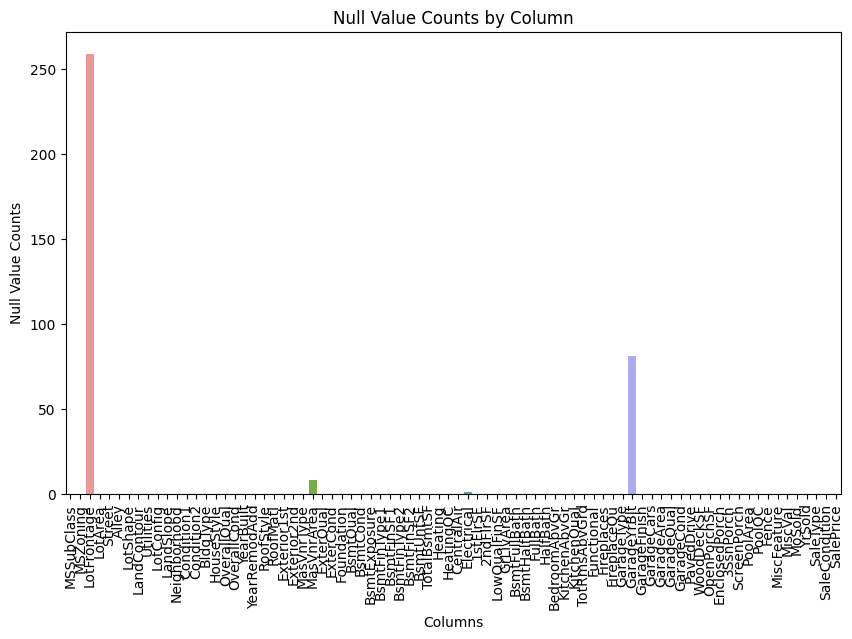

In [2410]:
#Find Null columns, we use Bar plot to visualize the nulls as there are large number of columns which are difficult to determine using describe() method for null or missing values.
nullCountsDf = updated_Df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=nullCountsDf.index, y=nullCountsDf.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Null Value Counts')
plt.title('Null Value Counts by Column')
plt.show()

####  LotFrontage, MasVnrArea, GarageYrBlt, Electrical columns have null or missing values:

In [2411]:
updated_Df['LotFrontage'].isnull().sum()


259

In [2412]:
updated_Df['MasVnrArea'].isnull().sum()

8

In [2413]:
updated_Df['GarageYrBlt'].isnull().sum()

81

In [2414]:
updated_Df['Electrical'].isnull().sum()

1

In [2415]:
#Finding the total nulls in the dataframe to cross check (259+8+81+1)
updated_Df.isnull().sum().sum()

349

In [2416]:
#Create a temporary dataframe with columns having null values along with Response or target column which is SaleProce
updated_Df_with_Nulls = updated_Df[['LotFrontage','MasVnrArea','GarageYrBlt','Electrical','SalePrice']]
updated_Df_with_Nulls.head()

,LotFrontage,MasVnrArea,GarageYrBlt,Electrical,SalePrice
0,65.0,196.0,2003.0,SBrkr,208500
1,80.0,0.0,1976.0,SBrkr,181500
2,68.0,162.0,2001.0,SBrkr,223500
3,60.0,0.0,1998.0,SBrkr,140000
4,84.0,350.0,2000.0,SBrkr,250000


In [2417]:
updated_Df.shape

(1460, 80)

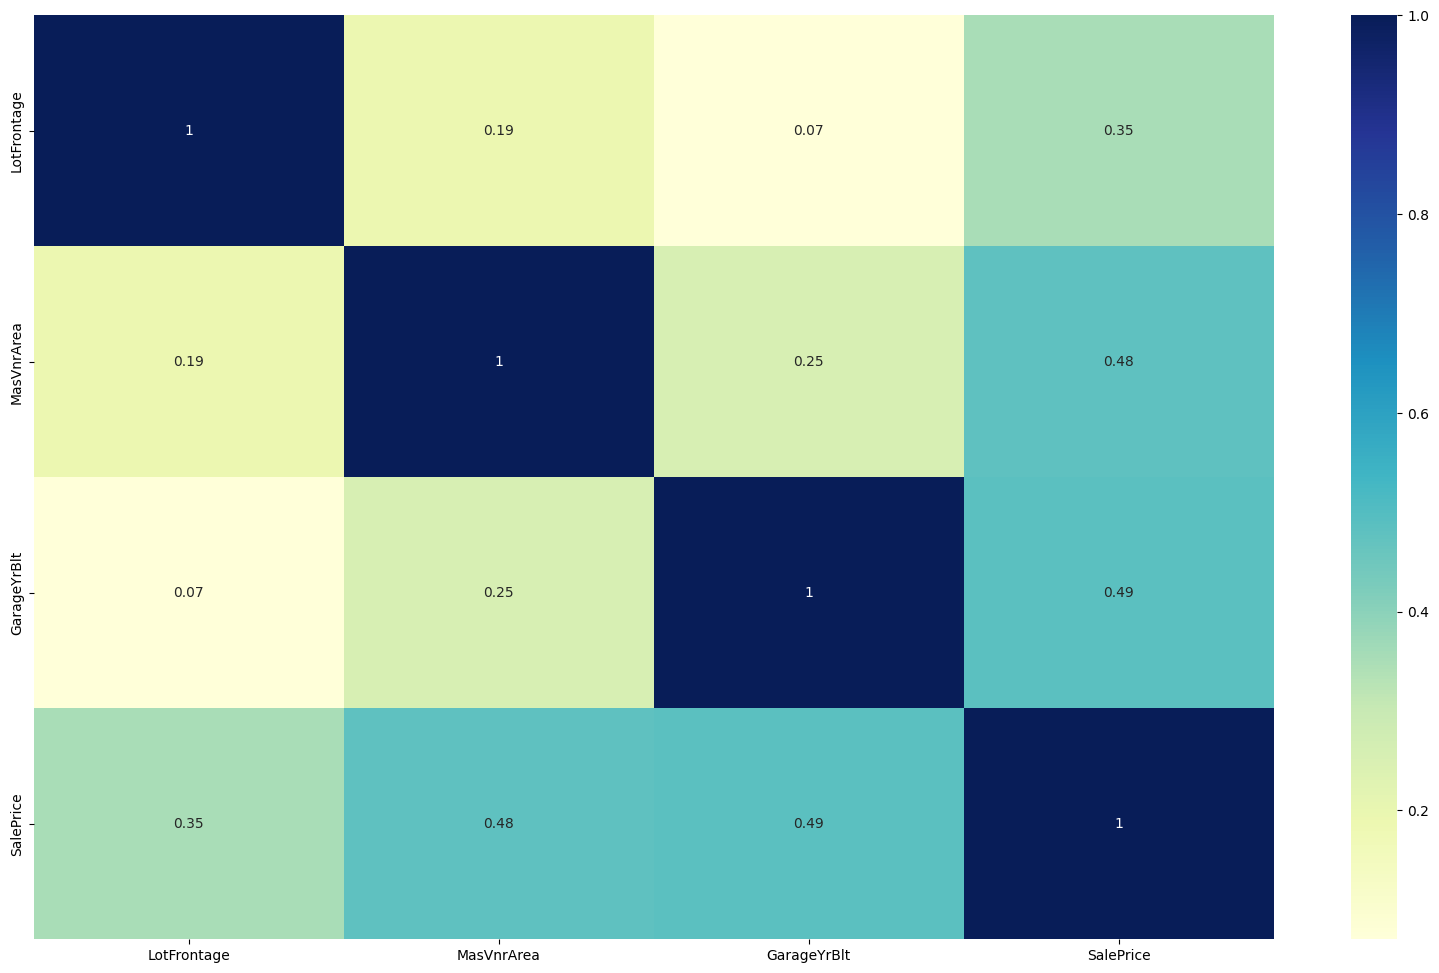

In [2418]:
#Get the sense of colenearity of these columns having nulls with Response column in Heat Map
plt.figure(figsize = (20, 12))
sns.heatmap(updated_Df_with_Nulls.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### We see MasVnrArea, LotFrontage,  GarageYrBlt have good correlation with SalePrice

In [2419]:
#We see MasVnrArea has good correlation with SalePrice, And 'None' values in MasVnrType have corresponding value 0 in MasVnrArea. Therefore we can safely replace NaN (Nulls) in MasVnrArea with 0
ColumnName = 'MasVnrArea'
updated_Df[ColumnName] = updated_Df[ColumnName].fillna(0)

In [2420]:
# Most of the values in LotShape are IR1 where LotFrontage is null. We replace the nulls in LotFrontage with mean of values in LotFrontage where LotShape are IR1
ColumnName = 'LotFrontage'
mean_LotFrontage = updated_Df[updated_Df['LotShape'] == 'IR1'][ColumnName].mean()
updated_Df[ColumnName] = updated_Df[ColumnName].fillna(int(mean_LotFrontage))

In [2421]:
#There is no logical way to fill nulls is GarageYrBlt column. We drop the null records
ColumnName = 'GarageYrBlt'
updated_Df = updated_Df.dropna(subset=[ColumnName])

In [2422]:
# We see for GarageYrBlt = 2007 and YrSold = 2008 the value in 'Electrical' column is 'SBrkr'. For 'Electrical' being NA, the values in GarageYrBlt and YrSold are 2007 and 2008 respectively.So we fill the only null in Electrical column with 'SBrkr'
ColumnName = 'Electrical'
updated_Df[ColumnName] = updated_Df[ColumnName].fillna('SBrkr')

In [2423]:
#Finding the total nulls in the dataframe
updated_Df.isnull().sum().sum()

0

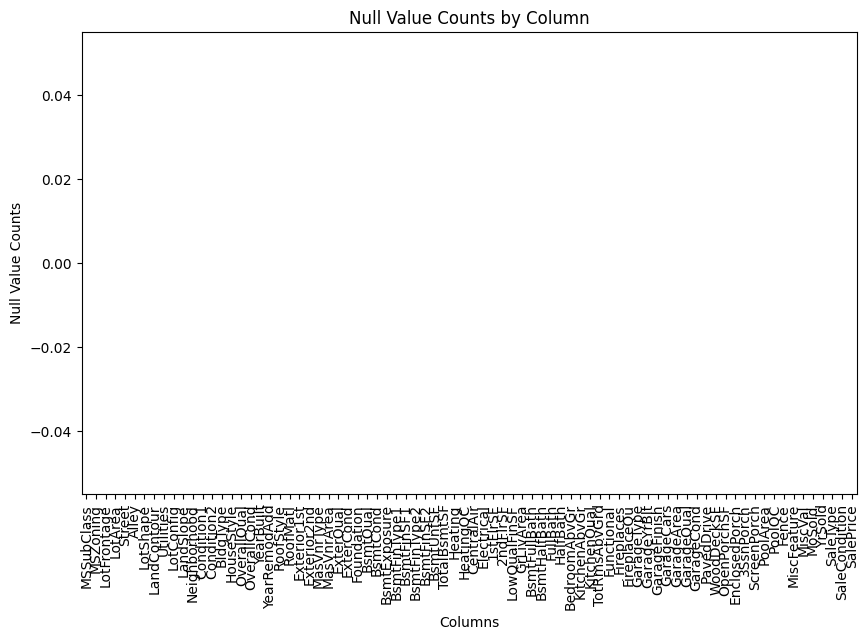

In [2424]:
#Check nulls again
nullCountsDf = updated_Df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=nullCountsDf.index, y=nullCountsDf.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Null Value Counts')
plt.title('Null Value Counts by Column')
plt.show()

In [2425]:
# We have finally got rid of the Nulls in the data

## Step 2: Data Preparation and re-analysis

### Create Dummy Columns
##### Now we create dummy columns for categorical variables (drop_first = True is to use n-1 dummy columns for n categorical values in a column):

In [2426]:
#For LotShape
LotShapes = pd.get_dummies(updated_Df['LotShape'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, LotShapes], axis = 1)

In [2427]:
#For LandContour
LandContours = pd.get_dummies(updated_Df['LandContour'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, LandContours], axis = 1)

In [2428]:
#For Utilities
Utilitiess = pd.get_dummies(updated_Df['Utilities'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Utilitiess], axis = 1)

In [2429]:
#For LotConfig
LotConfigs = pd.get_dummies(updated_Df['LotConfig'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, LotConfigs], axis = 1)

In [2430]:
#For Neighborhood
Neighborhoods = pd.get_dummies(updated_Df['Neighborhood'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Neighborhoods], axis = 1)

In [2431]:
#For BldgType
BldgTypes = pd.get_dummies(updated_Df['BldgType'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, BldgTypes], axis = 1)

In [2432]:
#For RoofMatl
RoofMatls = pd.get_dummies(updated_Df['RoofMatl'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, RoofMatls], axis = 1)

In [2433]:
#For Heating
Heatings = pd.get_dummies(updated_Df['Heating'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Heatings], axis = 1)

In [2434]:
#For Electrical
Electricals = pd.get_dummies(updated_Df['Electrical'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Electricals], axis = 1)

In [2435]:
#For SaleCondition
SaleConditions = pd.get_dummies(updated_Df['SaleCondition'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, SaleConditions], axis = 1)

In [2436]:
#For MSSubClass
MSSubClasss = pd.get_dummies(updated_Df['MSSubClass'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, MSSubClasss], axis = 1)

In [2437]:
#For MSZoning
MSZonings = pd.get_dummies(updated_Df['MSZoning'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, MSZonings], axis = 1)

In [2438]:
#For Street
Streets = pd.get_dummies(updated_Df['Street'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Streets], axis = 1)

In [2439]:
#For Alley
Alleys = pd.get_dummies(updated_Df['Alley'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Alleys], axis = 1)

In [2440]:
#For LandSlope
LandSlopes = pd.get_dummies(updated_Df['LandSlope'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, LandSlopes], axis = 1)

In [2441]:
#For Condition1
Condition1s = pd.get_dummies(updated_Df['Condition1'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Condition1s], axis = 1)

In [2442]:
#For Condition2
Condition2s = pd.get_dummies(updated_Df['Condition2'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Condition2s], axis = 1)

In [2443]:
#For HouseStyle
HouseStyles = pd.get_dummies(updated_Df['HouseStyle'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, HouseStyles], axis = 1)

In [2444]:
#For OverallQual
OverallQuals = pd.get_dummies(updated_Df['OverallQual'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, OverallQuals], axis = 1)

In [2445]:
#For OverallCond
OverallConds = pd.get_dummies(updated_Df['OverallCond'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, OverallConds], axis = 1)

In [2446]:
#For RoofStyle
RoofStyles = pd.get_dummies(updated_Df['RoofStyle'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, RoofStyles], axis = 1)

In [2447]:
#For Exterior1st
Exterior1sts = pd.get_dummies(updated_Df['Exterior1st'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Exterior1sts], axis = 1)

In [2448]:
#For Exterior2nd
Exterior2nds = pd.get_dummies(updated_Df['Exterior2nd'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Exterior2nds], axis = 1)

In [2449]:
#For MasVnrType
MasVnrTypes = pd.get_dummies(updated_Df['MasVnrType'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, MasVnrTypes], axis = 1)

In [2450]:
#For ExterQual
ExterQuals = pd.get_dummies(updated_Df['ExterQual'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, ExterQuals], axis = 1)

In [2451]:
#For ExterCond
ExterConds = pd.get_dummies(updated_Df['ExterCond'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, ExterConds], axis = 1)

In [2452]:
#For Foundation
Foundations = pd.get_dummies(updated_Df['Foundation'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Foundations], axis = 1)

In [2453]:
#For BsmtQual
BsmtQuals = pd.get_dummies(updated_Df['BsmtQual'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, BsmtQuals], axis = 1)

In [2454]:
#For BsmtCond
BsmtConds = pd.get_dummies(updated_Df['BsmtCond'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, BsmtConds], axis = 1)

In [2455]:
#For BsmtExposure
BsmtExposures = pd.get_dummies(updated_Df['BsmtExposure'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, BsmtExposures], axis = 1)

In [2456]:
#For BsmtFinType1
BsmtFinType1s = pd.get_dummies(updated_Df['BsmtFinType1'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, BsmtFinType1s], axis = 1)

In [2457]:
#For BsmtFinType2
BsmtFinType2s = pd.get_dummies(updated_Df['BsmtFinType2'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, BsmtFinType2s], axis = 1)

In [2458]:
#For HeatingQC
HeatingQCs = pd.get_dummies(updated_Df['HeatingQC'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, HeatingQCs], axis = 1)

In [2459]:
#For KitchenQual
KitchenQuals = pd.get_dummies(updated_Df['KitchenQual'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, KitchenQuals], axis = 1)

In [2460]:
#For Functional
Functionals = pd.get_dummies(updated_Df['Functional'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Functionals], axis = 1)

In [2461]:
#For FireplaceQu
FireplaceQus = pd.get_dummies(updated_Df['FireplaceQu'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, FireplaceQus], axis = 1)

In [2462]:
#For GarageType
GarageTypes = pd.get_dummies(updated_Df['GarageType'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, GarageTypes], axis = 1)

In [2463]:
#For GarageFinish
GarageFinishs = pd.get_dummies(updated_Df['GarageFinish'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, GarageFinishs], axis = 1)

In [2464]:
#For GarageQual
GarageQuals = pd.get_dummies(updated_Df['GarageQual'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, GarageQuals], axis = 1)

In [2465]:
#For GarageCond
GarageConds = pd.get_dummies(updated_Df['GarageCond'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, GarageConds], axis = 1)

In [2466]:
#For CentralAir -- Values are boolean in this column so we do not need to create dummy columns for this
# CentralAirs = pd.get_dummies(updated_Df['CentralAir'], drop_first = True)
# # Concat the results to the original dataframe - updated_Df 
# updated_Df = pd.concat([updated_Df, CentralAirs], axis = 1)

In [2467]:
#For PavedDrive
PavedDrives = pd.get_dummies(updated_Df['PavedDrive'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, PavedDrives], axis = 1)

In [2468]:
#For PoolQC
PoolQCs = pd.get_dummies(updated_Df['PoolQC'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, PoolQCs], axis = 1)

In [2469]:
#For Fence
Fences = pd.get_dummies(updated_Df['Fence'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Fences], axis = 1)

In [2470]:
#For MiscFeature
MiscFeatures = pd.get_dummies(updated_Df['MiscFeature'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, MiscFeatures], axis = 1)

In [2471]:
#For SaleType
SaleTypes = pd.get_dummies(updated_Df['SaleType'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, SaleTypes], axis = 1)

In [2472]:
#For GarageCars
GarageCarss = pd.get_dummies(updated_Df['GarageCars'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, GarageCarss], axis = 1)

In [2473]:
#For Fireplaces
Fireplacess = pd.get_dummies(updated_Df['Fireplaces'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, Fireplacess], axis = 1)


In [2474]:
#For KitchenAbvGr
KitchenAbvGrs = pd.get_dummies(updated_Df['KitchenAbvGr'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, KitchenAbvGrs], axis = 1)


In [2475]:
#For HalfBath
HalfBaths = pd.get_dummies(updated_Df['HalfBath'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, HalfBaths], axis = 1)


In [2476]:
#For FullBath
FullBaths = pd.get_dummies(updated_Df['FullBath'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, FullBaths], axis = 1)

In [2477]:
#For BsmtHalfBath
BsmtHalfBaths = pd.get_dummies(updated_Df['BsmtHalfBath'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, BsmtHalfBaths], axis = 1)

In [2478]:
#For BsmtFullBath
BsmtFullBaths = pd.get_dummies(updated_Df['BsmtFullBath'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, BsmtFullBaths], axis = 1)

In [2479]:
#For YearRemodAdd
YearRemodAdds = pd.get_dummies(updated_Df['YearRemodAdd'], drop_first = True,prefix='YearRemodAdd')
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, YearRemodAdds], axis = 1)


In [2480]:
#For YearBuilt
YearBuilts = pd.get_dummies(updated_Df['YearBuilt'], drop_first = True,prefix='YearBuilt')
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, YearBuilts], axis = 1)


In [2481]:
#For GarageYrBlt
GarageYrBlts = pd.get_dummies(updated_Df['GarageYrBlt'], drop_first = True,prefix='GarageYrBlt')
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, GarageYrBlts], axis = 1)



In [2482]:
#For YrSold
YrSolds = pd.get_dummies(updated_Df['YrSold'], drop_first = True,prefix='YrSold')
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, YrSolds], axis = 1)

In [2483]:
#For MoSold
MoSolds = pd.get_dummies(updated_Df['MoSold'], drop_first = True)
# Concat the results to the original dataframe - updated_Df 
updated_Df = pd.concat([updated_Df, MoSolds], axis = 1)


##### We do not need the original categorical columns anymore as we have created dummy columns for them,so we remove the redundancy by drop these:

In [2484]:
updated_Df.drop(['LotShape'], axis = 1, inplace = True)
updated_Df.drop(['LandContour'], axis = 1, inplace = True)
updated_Df.drop(['Utilities'], axis = 1, inplace = True)
updated_Df.drop(['LotConfig'], axis = 1, inplace = True)
updated_Df.drop(['Neighborhood'], axis = 1, inplace = True)
updated_Df.drop(['BldgType'], axis = 1, inplace = True)
updated_Df.drop(['RoofMatl'], axis = 1, inplace = True)
updated_Df.drop(['Heating'], axis = 1, inplace = True)
updated_Df.drop(['Electrical'], axis = 1, inplace = True)
updated_Df.drop(['SaleCondition'], axis = 1, inplace = True)
updated_Df.drop(['MSSubClass'], axis = 1, inplace = True)
updated_Df.drop(['MSZoning'], axis = 1, inplace = True)
updated_Df.drop(['Street'], axis = 1, inplace = True)
updated_Df.drop(['Alley'], axis = 1, inplace = True)
updated_Df.drop(['LandSlope'], axis = 1, inplace = True)
updated_Df.drop(['Condition1'], axis = 1, inplace = True)
updated_Df.drop(['Condition2'], axis = 1, inplace = True)
updated_Df.drop(['HouseStyle'], axis = 1, inplace = True)
updated_Df.drop(['OverallQual'], axis = 1, inplace = True)
updated_Df.drop(['OverallCond'], axis = 1, inplace = True)
updated_Df.drop(['RoofStyle'], axis = 1, inplace = True)
updated_Df.drop(['Exterior1st'], axis = 1, inplace = True)
updated_Df.drop(['Exterior2nd'], axis = 1, inplace = True)
updated_Df.drop(['MasVnrType'], axis = 1, inplace = True)
updated_Df.drop(['ExterQual'], axis = 1, inplace = True)
updated_Df.drop(['ExterCond'], axis = 1, inplace = True)
updated_Df.drop(['Foundation'], axis = 1, inplace = True)
updated_Df.drop(['BsmtQual'], axis = 1, inplace = True)
updated_Df.drop(['BsmtCond'], axis = 1, inplace = True)
updated_Df.drop(['BsmtExposure'], axis = 1, inplace = True)
updated_Df.drop(['BsmtFinType1'], axis = 1, inplace = True)
updated_Df.drop(['BsmtFinType2'], axis = 1, inplace = True)
updated_Df.drop(['HeatingQC'], axis = 1, inplace = True)
updated_Df.drop(['KitchenQual'], axis = 1, inplace = True)
updated_Df.drop(['Functional'], axis = 1, inplace = True)
updated_Df.drop(['FireplaceQu'], axis = 1, inplace = True)
updated_Df.drop(['GarageType'], axis = 1, inplace = True)
updated_Df.drop(['GarageFinish'], axis = 1, inplace = True)
updated_Df.drop(['GarageQual'], axis = 1, inplace = True)
updated_Df.drop(['GarageCond'], axis = 1, inplace = True)
updated_Df.drop(['PavedDrive'], axis = 1, inplace = True)
updated_Df.drop(['PoolQC'], axis = 1, inplace = True)
updated_Df.drop(['Fence'], axis = 1, inplace = True)
updated_Df.drop(['MiscFeature'], axis = 1, inplace = True)
updated_Df.drop(['SaleType'], axis = 1, inplace = True)
updated_Df.drop(['GarageCars'], axis = 1, inplace = True)
updated_Df.drop(['Fireplaces'], axis = 1, inplace = True)
updated_Df.drop(['KitchenAbvGr'], axis = 1, inplace = True)
updated_Df.drop(['HalfBath'], axis = 1, inplace = True)
updated_Df.drop(['FullBath'], axis = 1, inplace = True)
updated_Df.drop(['BsmtHalfBath'], axis = 1, inplace = True)
updated_Df.drop(['BsmtFullBath'], axis = 1, inplace = True)
updated_Df.drop(['YearRemodAdd'], axis = 1, inplace = True)
updated_Df.drop(['YearBuilt'], axis = 1, inplace = True)
updated_Df.drop(['GarageYrBlt'], axis = 1, inplace = True)
updated_Df.drop(['YrSold'], axis = 1, inplace = True)
updated_Df.drop(['MoSold'], axis = 1, inplace = True)


updated_Df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,65.0,8450,196.0,706,0,150,856,1,856,854,...,0,1,0,0,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1,1262,0,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,162.0,486,0,434,920,1,920,866,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,0.0,216,0,540,756,1,961,756,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1,1145,1053,...,1,0,0,0,0,0,0,0,0,0


In [2485]:
updated_Df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
mean,71.654822,10695.812183,108.364757,455.578680,48.102248,570.765047,1074.445975,0.949964,1177.129804,353.424946,...,0.039159,0.036983,0.038434,0.161711,0.176215,0.070341,0.139956,0.055838,0.063089,0.040609
std,22.027389,10214.702133,184.195220,459.691379,164.324665,443.677845,436.371874,0.218099,387.014961,439.553171,...,0.194043,0.188789,0.192310,0.368319,0.381141,0.255813,0.347068,0.229691,0.243212,0.197455
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7741.000000,0.000000,0.000000,0.000000,228.000000,810.000000,1.000000,894.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,9591.000000,0.000000,400.000000,0.000000,476.000000,1008.000000,1.000000,1098.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,11708.500000,170.500000,732.000000,0.000000,811.000000,1314.000000,1.000000,1414.000000,738.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,1.000000,4692.000000,2065.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2486]:
updated_Df.columns = updated_Df.columns.astype(str) #This is required to keep the column names as string

###  Let's check the correlations now

In [2487]:
# correlation matrix
updated_Df_Numeric = updated_Df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'
,'BedroomAbvGr','TotRmsAbvGrd','GarageArea','WoodDeckSF','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'
,'SalePrice']]
corrl = updated_Df_Numeric.corr()
corrl


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.312524,0.175099,0.227183,0.046730,0.097187,0.355735,0.407704,0.066637,0.008260,...,0.327905,0.080348,0.080348,0.148858,0.010442,0.063386,0.032037,0.184452,0.008112,0.326926
LotArea,0.312524,1.000000,0.095510,0.210145,0.110011,-0.009707,0.252932,0.291478,0.046253,0.010177,...,0.167622,0.166600,0.166600,0.085056,-0.013427,0.018443,0.038605,0.076868,0.040288,0.252921
MasVnrArea,0.175099,0.095510,1.000000,0.253765,-0.077065,0.113269,0.353471,0.332127,0.173013,-0.060661,...,0.366771,0.151293,0.151293,0.126715,-0.104787,0.015923,0.055041,0.010030,-0.029238,0.463139
BsmtFinSF1,0.227183,0.210145,0.253765,1.000000,-0.054966,-0.502954,0.521366,0.446596,-0.142969,-0.050021,...,0.289128,0.194729,0.194729,0.120338,-0.096743,0.023903,0.056216,0.141615,0.006846,0.375563
BsmtFinSF2,0.046730,0.110011,-0.077065,-0.054966,1.000000,-0.214549,0.100526,0.094006,-0.106641,0.007453,...,-0.047320,0.063257,0.063257,0.004866,0.045387,-0.031442,0.087332,0.041470,0.006052,-0.023243
BsmtUnfSF,0.097187,-0.009707,0.113269,-0.502954,-0.214549,1.000000,0.406118,0.311394,-0.006450,-0.000859,...,0.201121,-0.005322,-0.005322,0.131830,0.001498,0.020335,-0.015133,-0.036528,-0.019059,0.213135
TotalBsmtSF,0.355735,0.252932,0.353471,0.521366,0.100526,0.406118,1.000000,0.822469,-0.197325,-0.050762,...,0.491248,0.223545,0.223545,0.262639,-0.083298,0.034016,0.076720,0.127659,-0.009887,0.603583
1stFlrSF,0.407704,0.291478,0.332127,0.446596,0.094006,0.311394,0.822469,1.000000,-0.223710,-0.018854,...,0.495321,0.225905,0.225905,0.224826,-0.051324,0.053200,0.080980,0.132555,-0.015264,0.594935
2ndFlrSF,0.066637,0.046253,0.173013,-0.142969,-0.106641,-0.006450,-0.197325,-0.223710,1.000000,0.045547,...,0.128010,0.089892,0.089892,0.203821,0.064856,-0.026654,0.037506,0.082247,0.012266,0.313336
LowQualFinSF,0.008260,0.010177,-0.060661,-0.050021,0.007453,-0.000859,-0.050762,-0.018854,0.045547,1.000000,...,0.015119,-0.006935,-0.006935,0.020296,0.049594,-0.000254,0.045358,0.080516,-0.000251,-0.008364


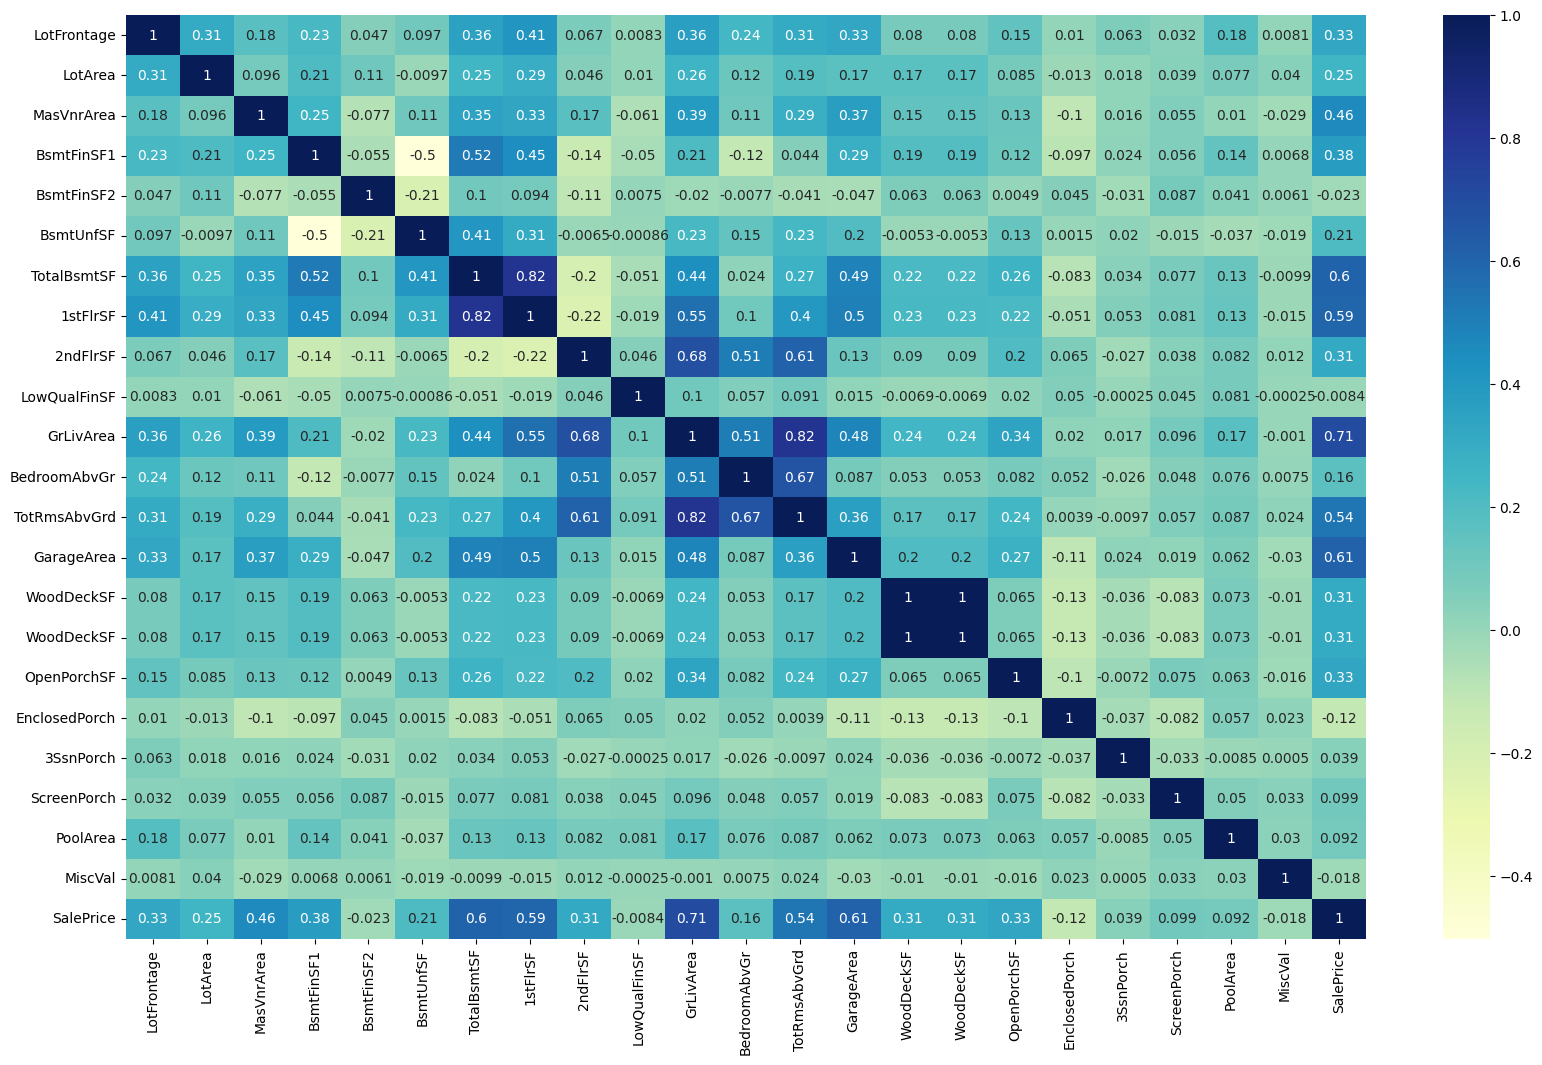

In [2488]:
plt.figure(figsize = (20, 12))
sns.heatmap(updated_Df_Numeric.corr(), annot = True, cmap="YlGnBu")
plt.show()

### We see that we have GrLiveArea, TotalBsmtSF, ,GarageArea, 1stFlrSF, MasVnrArea are 5 top predictors having high correlation with SalePrice. We will see later what comes out with our model predictions.   

## Step 3: Splitting the Data into Training and Testing Sets and Rescaling the training set

In [2489]:
np.random.seed(0)
df_train, df_test = train_test_split(updated_Df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2490]:
df_train.shape

(965, 564)

In [2491]:
df_test.shape

(414, 564)

### Rescaling the Features 

We will use MinMax scaling.

In [2492]:
scaler = MinMaxScaler()

In [2493]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables for train data

nondummy_nonbool_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'
,'BedroomAbvGr','TotRmsAbvGrd','GarageArea','WoodDeckSF','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'
,'SalePrice']


In [2494]:
df_train[nondummy_nonbool_vars] = scaler.fit_transform(df_train[nondummy_nonbool_vars])

In [2495]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables for test data
df_test[nondummy_nonbool_vars] = scaler.fit_transform(df_test[nondummy_nonbool_vars])

#### Now we divide train data into X and Y sets for the model building:

In [2496]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [2497]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [2498]:
X_train.columns.size

563

In [2499]:
X_test.columns.size

563

## Step 4: Building Linear Regression model

### Step 4.1: Building and analyzing Linear Regression model 

In [2500]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [2501]:
y_pred_train = lm.predict(X_train)

In [2502]:
metric=[]
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

0.9747502078304402


#### Let's test the model

In [2503]:
y_pred_test = lm.predict(X_test)

In [2504]:
r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

-3.291518890550015e+21


Text(0, 0.5, 'y_pred_train')

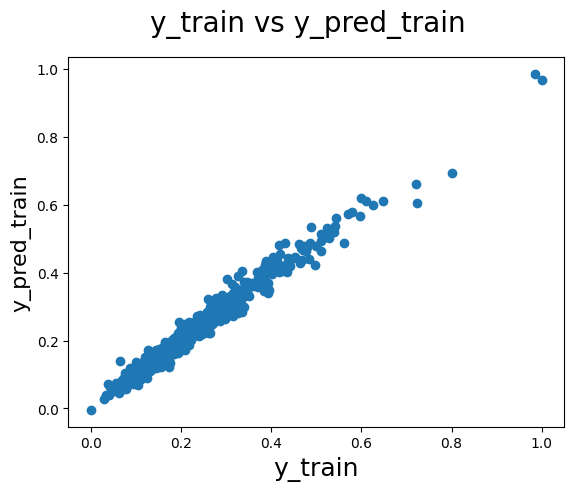

In [2505]:
# Plotting y_train and y_pred_train to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred_train)
# plt.plot(y_train , y_pred_train , color = 'red' , linewidth = 3)
fig.suptitle('y_train vs y_pred_train', fontsize=20)              
plt.xlabel('y_train', fontsize=18)                         
plt.ylabel('y_pred_train', fontsize=16) 

Text(0, 0.5, 'y_pred_test')

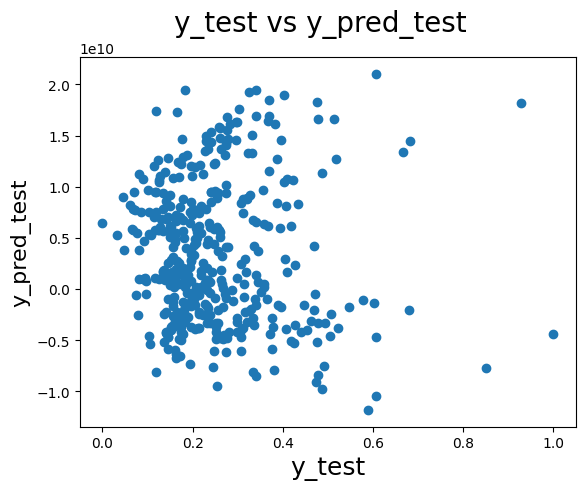

In [2506]:
# Plotting y_test and y_pred_test to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
# plt.plot(y_test , y_pred_test , color = 'red' , linewidth = 3)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred_test', fontsize=16) 

### As we see that the model predicted too well on train data, while with test data it is very poor. Even the r squared value is negative when predicting test data. Also It is evident from the scatter plots that this is clear case of overfitting in train data. 
## Therefore we skip looking at rss, mse, rsme and move forward with Ridge and Lasso approach.

### Step 4.2: Building and analyzing Ridge Regression model

In [2507]:
# Setting some Lambda ('alpha' in sklearn library) values. This is to find the best lambda (alpha) to create Ridge model.
params = {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0
                  ,6.0,7.0,8.0,9.0,10,11,12,12.5,13,13.5,14,14.5,15,15.5,16,17,18,19,20,30,50,100,500,1000]}

In [2508]:
ridge = Ridge()
folds = 5
model_rg = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_rg.fit(X_train,y_train)

Fitting 5 folds for each of 43 candidates, totalling 215 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11,
                                   12, 12.5, 13, 13.5, 14, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2509]:
# Checking best hyperparameter (alpha)
print(model_rg.best_params_)

{'alpha': 14}


In [2510]:
# So alpha =14 gives highest negative mean absolute error. So we create ridge regression model with alpha = 14
alpha = 14
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.03769022e-03  1.46773856e-02  2.38950014e-02  1.31206033e-02
  7.06868763e-03  8.32206090e-03  1.70069173e-02  1.07847922e-02
  3.30065919e-02  3.35314421e-02  4.85331399e-03  4.08202470e-02
  1.88086305e-03  4.02081087e-02  1.74428114e-02  1.26659962e-02
  1.30226742e-02 -3.50927517e-03  7.56217756e-03  1.22610332e-02
  7.02571719e-03  8.33648661e-04  1.05874333e-02 -4.32870159e-03
 -2.85067857e-03  3.06398541e-03  5.37620908e-03  4.68790250e-03
  0.00000000e+00  1.21853205e-02 -9.33517865e-03 -3.51147115e-03
 -2.69112887e-03 -2.23935101e-03 -2.54724296e-04  7.32545713e-03
 -1.73450106e-03 -6.36898214e-03  1.64876924e-02 -1.58922457e-02
 -1.46648064e-02 -6.67816300e-03 -9.04568338e-03 -9.67485350e-03
 -9.90654712e-03  1.67861395e-04 -3.28673879e-03  3.57644868e-02
  1.97247738e-02 -7.26170319e-03 -1.11293041e-02 -8.47075326e-03
  3.52327429e-04  9.42004032e-03  2.31492430e-02 -7.02165630e-04
  3.99762112e-03 -1.82403291e-03 -2.46713448e-03 -1.00150581e-02
 -6.59660220e-03 -1.03003

In [2511]:
# Now we check metrics - R2 score, RSS and RMSE, with the Ridge model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metricRidge = []
r2_train_rg = r2_score(y_train, y_pred_train)
print('R2 Square train data:', r2_train_rg)
metricRidge.append(r2_train_rg)

r2_test_rg = r2_score(y_test, y_pred_test)
print('R2 Square test data:', r2_test_rg)
metricRidge.append(r2_test_rg)

rss_train_rg = np.sum(np.square(y_train - y_pred_train))
print('RSS for train data:',rss_train_rg)
metricRidge.append(rss_train_rg)

rss_test_rg = np.sum(np.square(y_test - y_pred_test))
print('RSS for test data:',rss_test_rg)
metricRidge.append(rss_test_rg)

mse_train_rg = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for train data:',mse_train_rg)
rsme_train_rg = mse_train_rg**0.5
print('Root mean squared error for train data:',rsme_train_rg)
metricRidge.append(rsme_train_rg)

mse_test_rg = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data:',mse_test_rg)
rsme_test_rg = mse_test_rg**0.5
print('Root mean squared error for test data:',rsme_test_rg)
metricRidge.append(rsme_test_rg)

R2 Square train data: 0.9055188953251976
R2 Square test data: 0.7618962468731028
RSS for train data: 1.1210250902297951
RSS for test data: 1.7113801116399485
Mean squared error for train data: 0.0011616840313262125
Root mean squared error for train data: 0.034083486196781754
Mean squared error for test data: 0.00413376838560374
Root mean squared error for test data: 0.06429438844567806


#### We see the big difference in R2 Square between train and test, lets check what comes out with Lasso

### Step 4.3: Building and analyzing Lasso Regression model

In [2512]:
# We will do grid search to find best alpha using same alphas we had set for Ridge regression
lasso = Lasso()

model_lso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lso.fit(X_train, y_train) 

Fitting 5 folds for each of 43 candidates, totalling 215 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11,
                                   12, 12.5, 13, 13.5, 14, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2513]:
# Checking best hyperparameter (alpha)
print(model_lso.best_params_)

{'alpha': 0.0001}


In [2514]:
# So alpha = 0.0001 gives highest negative mean absolute error. So we create lasso regression model with alpha = 0.0001
alpha =0.0001
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [2515]:
# Now we check metrics - R2 score, RSS and RMSE, with the Lasso model
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metricLasso = []
r2_train_lso = r2_score(y_train, y_pred_train)
print('R2 Square train data:', r2_train_lso)
metricLasso.append(r2_train_lso)

r2_test_lso = r2_score(y_test, y_pred_test)
print('R2 Square test data:', r2_test_lso)
metricLasso.append(r2_test_lso)

rss_train_lso = np.sum(np.square(y_train - y_pred_train))
print('RSS for train data:',rss_train_lso)
metricLasso.append(rss_train_lso)

rss_test_lso = np.sum(np.square(y_test - y_pred_test))
print('RSS for test data:',rss_test_lso)
metricLasso.append(rss_test_lso)

mse_train_lso = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for train data:',mse_train_lso)
rsme_train_lso = mse_train_lso**0.5
print('Root mean squared error for train data:',rsme_train_lso)
metricLasso.append(rsme_train_lso)

mse_test_lso = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data:',mse_test_lso)
rsme_test_lso = mse_test_lso**0.5
print('Root mean squared error for test data:',rsme_test_lso)
metricLasso.append(rsme_test_lso)

R2 Square train data: 0.9296918501337578
R2 Square test data: 0.7705723304847263
RSS for train data: 0.8342112459308949
RSS for test data: 1.649020418670537
Mean squared error for train data: 0.0008644676123636217
Root mean squared error for train data: 0.029401830085279072
Mean squared error for test data: 0.003983141107899848
Root mean squared error for test data: 0.0631121312260951


#### We see that like Ridge regression the Lasso regression also gives big difference in R2 Square between train and test predictions. However the Lasso gives a little better prediction with test data than Ridge. We revisit the features and analyze further.. 

### Observer coefficients (betas)

In [2516]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns


In [2517]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [2518]:
betas_sort = betas[betas['Lasso'] != 0.0].sort_values(by='Lasso', ascending=False)
pd.set_option('display.max_rows', None)
betas_sort.head(500)

,Linear,Ridge,Lasso
GrLivArea,-2.446968e+10,0.040820,0.335467
VeryExcellent_OverallQual,1.069489e-01,0.050043,0.120065
WdShngl,-4.904917e+09,0.029980,0.108684
Excellent_OverallQual,7.150173e-02,0.036977,0.081572
LotArea,3.050496e-01,0.014677,0.067806
3_FullBath,8.922672e-02,0.039915,0.048095
3_GarageCars,1.806951e-02,0.046746,0.043682
NoRidge,1.835728e-02,0.035764,0.042380
StoneBr,4.406357e-02,0.023149,0.040116
VeryGood_OverallQual,1.619399e-02,0.017861,0.030482


## 5. Let's see if we can improve the model with feature selection using RFE.

### 5.1. Linear regression

In [2519]:
# Running RFE with the output number of the variable equal to 250
lm = LinearRegression()
lm.fit(X_train, y_train)
no_features = 250
rfe = RFE(lm, n_features_to_select=no_features)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [2520]:
# Lets get these predictors
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       ...
       'GarageYrBlt_2000.0', 'GarageYrBlt_2001.0', 'GarageYrBlt_2002.0',
       'GarageYrBlt_2003.0', 'GarageYrBlt_2004.0', 'GarageYrBlt_2005.0',
       'GarageYrBlt_2006.0', 'GarageYrBlt_2007.0', 'GarageYrBlt_2008.0',
       'GarageYrBlt_2009.0'],
      dtype='object', length=250)

### Build the LR model with RFE columns

In [2521]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     50.74
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:49:00   Log-Likelihood:                 2061.1
No. Observations:                 965   AIC:                            -3702.
Df Residuals:                     755   BIC:                            -2679.
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Predict LR with RFE on the train data

In [2522]:
y_pred_train = lm.predict(X_train_rfe)

In [2523]:
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)

0.9335327051938386


### We see the very good R squared value almost equal to what received in model summary. Let's apply the model on test data

In [2524]:
#Drop const from the columns list
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Creating X_test_new dataframe using the X_train_new columns
X_test_new = X_test[X_train_rfe.columns]
# Adding the constant variable back
X_test_new = sm.add_constant(X_test_new)

In [2525]:
# We do the prediction now:
y_pred_test = lm.predict(X_test_new)

In [2526]:
r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)

0.31217749340690526


#### We see that R Squared improved but its very far away from fitting testing data as per the LR model. 

### 5.2. Let's check Ridge Regresion with columns selected by RFE

In [2527]:
# Setting some Lambda ('alpha' in sklearn library) values. This is to find the best lambda (alpha) to create Ridge model.
params = {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0
                  ,6.0,7.0,8.0,9.0,10,11,12,12.5,13,13.5,14,14.5,15,15.5,16,17,18,19,20,30,50,100,500,1000]}

In [2528]:
ridge = Ridge()
folds = 5
model_rg = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_rg.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 43 candidates, totalling 215 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11,
                                   12, 12.5, 13, 13.5, 14, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2529]:
print(model_rg.best_params_)

{'alpha': 1.0}


In [2530]:
# So alpha =1.0 gives highest negative mean absolute error. So we create ridge regression model with alpha = 1.0
alpha = 1.0
ridge = Ridge(alpha = alpha)
ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.11401435  0.11426324  0.02200386 -0.01577852  0.10482435  0.19441697
  0.07652596 -0.00833824  0.18837556 -0.01505246  0.05210115  0.06201814
  0.03028836  0.          0.03528104  0.05750313 -0.01251086 -0.01636346
  0.02226022  0.05437926  0.02475943  0.0176858   0.05571919  0.04756331
  0.14087545 -0.01757127  0.01044635  0.          0.01043014  0.01662562
 -0.01251086 -0.0143039  -0.01636346  0.03620698 -0.00836165  0.00348556
  0.03459898 -0.02527663  0.00275968  0.          0.          0.
  0.00105804 -0.04132326  0.01188229  0.08276229  0.11108105  0.02501135
  0.          0.0302524  -0.04809956 -0.01796236  0.         -0.01796236
  0.         -0.02603137  0.0120773   0.00576576  0.01028852  0.00922234
 -0.00329585 -0.00329585  0.         -0.00329585  0.          0.03571134
 -0.01731294  0.01300039  0.00446448 -0.00367586 -0.00873968  0.03764875
 -0.02548724 -0.00342182 -0.01937705 -0.20696591  0.02257078 -0.00189527
  0.01818329 -0.00217308 -0.03804101  0.04287047  0.0642595

In [2531]:
# Now we check metrics - R2 score, RSS and RMSE, with the Ridge model
X_test_new = X_test_new.drop(['const'], axis=1)

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metricRidge = []
r2_train_rg = r2_score(y_train, y_pred_train)
print('R2 Square train data:', r2_train_rg)
metricRidge.append(r2_train_rg)

r2_test_rg = r2_score(y_test, y_pred_test)
print('R2 Square test data:', r2_test_rg)
metricRidge.append(r2_test_rg)

rss_train_rg = np.sum(np.square(y_train - y_pred_train))
print('RSS for train data:',rss_train_rg)
metricRidge.append(rss_train_rg)

rss_test_rg = np.sum(np.square(y_test - y_pred_test))
print('RSS for test data:',rss_test_rg)
metricRidge.append(rss_test_rg)

mse_train_rg = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for train data:',mse_train_rg)
rsme_train_rg = mse_train_rg**0.5
print('Root mean squared error for train data:',rsme_train_rg)
metricRidge.append(rsme_train_rg)

mse_test_rg = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data:',mse_test_rg)
rsme_test_rg = mse_test_rg**0.5
print('Root mean squared error for test data:',rsme_test_rg)
metricRidge.append(rsme_test_rg)

R2 Square train data: 0.8915933982231065
R2 Square test data: 0.7078208261230713
RSS for train data: 1.2862521131260447
RSS for test data: 2.1000493299317116
Mean squared error for train data: 0.0013329037441720672
Root mean squared error for train data: 0.03650895430126789
Mean squared error for test data: 0.005072582922540366
Root mean squared error for test data: 0.07122206766543897


### Let's check Lasso regression

In [2532]:
# We will do grid search to find best alpha using same alphas we had set for Ridge regression
lasso = Lasso()

model_lso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lso.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 43 candidates, totalling 215 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11,
                                   12, 12.5, 13, 13.5, 14, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2533]:
# Checking best hyperparameter (alpha)
print(model_lso.best_params_)

{'alpha': 0.0001}


In [2534]:
# So alpha = 0.0001 gives highest negative mean absolute error. So we create lasso regression model with alpha = 0.0001
alpha =0.0001
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [2535]:
# Now we check metrics - R2 score, RSS and RMSE, with the Lasso model
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metricLasso = []
r2_train_lso = r2_score(y_train, y_pred_train)
print('R2 Square train data:', r2_train_lso)
metricLasso.append(r2_train_lso)

r2_test_lso = r2_score(y_test, y_pred_test)
print('R2 Square test data:', r2_test_lso)
metricLasso.append(r2_test_lso)

rss_train_lso = np.sum(np.square(y_train - y_pred_train))
print('RSS for train data:',rss_train_lso)
metricLasso.append(rss_train_lso)

rss_test_lso = np.sum(np.square(y_test - y_pred_test))
print('RSS for test data:',rss_test_lso)
metricLasso.append(rss_test_lso)

mse_train_lso = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for train data:',mse_train_lso)
rsme_train_lso = mse_train_lso**0.5
print('Root mean squared error for train data:',rsme_train_lso)
metricLasso.append(rsme_train_lso)

mse_test_lso = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data:',mse_test_lso)
rsme_test_lso = mse_test_lso**0.5
print('Root mean squared error for test data:',rsme_test_lso)
metricLasso.append(rsme_test_lso)

R2 Square train data: 0.8790544872196937
R2 Square test data: 0.6947396584083603
RSS for train data: 1.435027192411638
RSS for test data: 2.1940707385403018
Mean squared error for train data: 0.0014870748107892622
Root mean squared error for train data: 0.03856260897280243
Mean squared error for test data: 0.005299687774251937
Root mean squared error for test data: 0.07279895448598102


In [2536]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns

In [2537]:

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [2538]:
betas_sort = betas[betas['Lasso'] != 0.0].sort_values(by='Lasso', ascending=False)
pd.set_option('display.max_rows', None)
betas_sort.head(500)

,Ridge,Lasso
GrLivArea,0.188376,4.238055e-01
BsmtFinSF1,0.114263,1.621904e-01
WdShngl,0.140875,1.327723e-01
LotArea,0.114014,1.080167e-01
VeryExcellent_OverallQual,0.111081,1.042847e-01
Excellent_OverallQual,0.082762,8.161293e-02
TotalBsmtSF,0.104824,7.061851e-02
YearBuilt_2009,0.046242,6.262238e-02
3_GarageCars,0.064260,6.207040e-02
StoneBr,0.057503,5.968013e-02


## With RFE the models have not got better, instead both Lasso and Ridge are performing poor than with RFE selection of 250 columns.

## Overall we found the Lasso regression performing best. From section 4 we see even the Lasso has big difference between tain and test predictions with respect to R2, still Lasso is able to inference 77% of the test data.

### We found that the optimal value of alpha for Ridge: 14 and for Lasso: 0.0001

### Lets see the scatter plot on Lasso predition of test data:

Text(0, 0.5, 'y_pred_test')

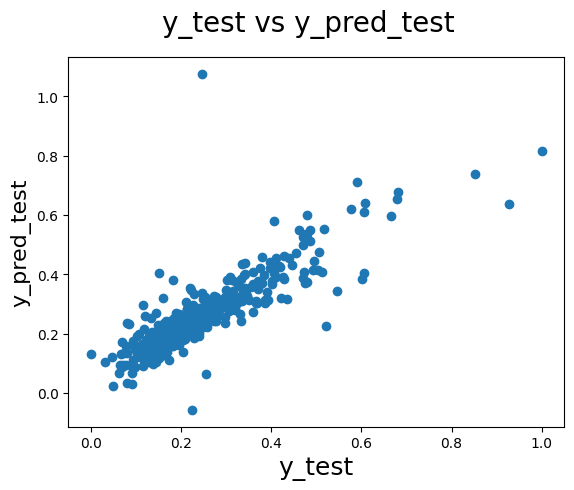

In [2539]:
# Plotting y_test and y_pred_test to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
# plt.plot(y_test , y_pred_test , color = 'red' , linewidth = 3)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred_test', fontsize=16) 

### The above plot shows that except some values with high values in y_test most of the graph shows linear.

## 6. For subjective assignment let's check Ridge and Lasso by doubling the values of alpha

### 6.1. For Ridge:

In [2540]:
# Optimal value of alpha is 14 for Ridge. We use 28 as double
alpha = 28
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 4.52175115e-03  9.34076818e-03  1.99130061e-02  1.01015406e-02
  5.00734798e-03  9.72580069e-03  1.42575117e-02  1.03531981e-02
  2.48058390e-02  2.50844814e-02  3.89527615e-03  3.06594141e-02
  4.34577796e-03  3.32850659e-02  1.88988201e-02  1.07683080e-02
  1.18208051e-02 -2.51419459e-03  4.26642124e-03  9.72142774e-03
  5.04094347e-03  4.21308231e-04  8.83919018e-03 -2.75021587e-03
 -4.51022340e-03  1.67440728e-03  4.26137079e-03  2.73132363e-03
  0.00000000e+00  1.01409547e-02 -7.02106219e-03 -1.84658415e-03
 -2.86716133e-03 -1.12520101e-03 -8.36926939e-04  6.38372242e-03
 -1.54704527e-04 -6.27743102e-03  1.25078128e-02 -1.36238712e-02
 -1.48518050e-02 -5.19140689e-03 -6.97211779e-03 -6.97976219e-03
 -8.49315481e-03 -8.65513829e-05 -1.24430990e-03  2.89035222e-02
  1.93425466e-02 -4.34871223e-03 -7.91715462e-03 -7.10108584e-03
 -6.04226157e-04  6.24030006e-03  1.57343697e-02  1.62422393e-04
  2.48730086e-03 -1.83976374e-03 -2.40928368e-03 -8.57426823e-03
 -5.77514186e-03 -9.64976

In [2541]:
# Now we check metrics - R2 score, RSS and RMSE, with the Ridge model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metricRidge = []
r2_train_rg = r2_score(y_train, y_pred_train)
print('R2 Square train data:', r2_train_rg)
metricRidge.append(r2_train_rg)

r2_test_rg = r2_score(y_test, y_pred_test)
print('R2 Square test data:', r2_test_rg)
metricRidge.append(r2_test_rg)

rss_train_rg = np.sum(np.square(y_train - y_pred_train))
print('RSS for train data:',rss_train_rg)
metricRidge.append(rss_train_rg)

rss_test_rg = np.sum(np.square(y_test - y_pred_test))
print('RSS for test data:',rss_test_rg)
metricRidge.append(rss_test_rg)

mse_train_rg = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for train data:',mse_train_rg)
rsme_train_rg = mse_train_rg**0.5
print('Root mean squared error for train data:',rsme_train_rg)
metricRidge.append(rsme_train_rg)

mse_test_rg = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data:',mse_test_rg)
rsme_test_rg = mse_test_rg**0.5
print('Root mean squared error for test data:',rsme_test_rg)
metricRidge.append(rsme_test_rg)

R2 Square train data: 0.8855291467000336
R2 Square test data: 0.7369586200989697
RSS for train data: 1.358204892829752
RSS for test data: 1.890620287119274
Mean squared error for train data: 0.0014074662101862716
Root mean squared error for train data: 0.03751621263115817
Mean squared error for test data: 0.0045667156693702275
Root mean squared error for test data: 0.06757747901017193


In [2542]:
# Values with alpha = 14==>
# R2 Square train data: 0.9055188953251976
# R2 Square test data: 0.7618962468731028
# RSS for train data: 1.1210250902297951
# RSS for test data: 1.7113801116399485
# Mean squared error for train data: 0.0011616840313262125
# Root mean squared error for train data: 0.034083486196781754
# Mean squared error for test data: 0.00413376838560374
# Root mean squared error for test data: 0.06429438844567806

### We see above that the R2 has got decreased for both test and train sets.  RSS for the train set has reduced a bit but for test set the RSS has increased. RMSE has also increased for both train and test datasets.

### 6.2. For Lasso:

In [2543]:
# Optimal value of alpha is 0.0001 for Ridge. We use 0.0002 as double
alpha =0.0002
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [2544]:
# Now we check metrics - R2 score, RSS and RMSE, with the Lasso model
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metricLasso = []
r2_train_lso = r2_score(y_train, y_pred_train)
print('R2 Square train data:', r2_train_lso)
metricLasso.append(r2_train_lso)

r2_test_lso = r2_score(y_test, y_pred_test)
print('R2 Square test data:', r2_test_lso)
metricLasso.append(r2_test_lso)

rss_train_lso = np.sum(np.square(y_train - y_pred_train))
print('RSS for train data:',rss_train_lso)
metricLasso.append(rss_train_lso)

rss_test_lso = np.sum(np.square(y_test - y_pred_test))
print('RSS for test data:',rss_test_lso)
metricLasso.append(rss_test_lso)

mse_train_lso = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for train data:',mse_train_lso)
rsme_train_lso = mse_train_lso**0.5
print('Root mean squared error for train data:',rsme_train_lso)
metricLasso.append(rsme_train_lso)

mse_test_lso = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data:',mse_test_lso)
rsme_test_lso = mse_test_lso**0.5
print('Root mean squared error for test data:',rsme_test_lso)
metricLasso.append(rsme_test_lso)

R2 Square train data: 0.9139951019980288
R2 Square test data: 0.768712933370046
RSS for train data: 1.020454289508081
RSS for test data: 1.6623849087296612
Mean squared error for train data: 0.0010574655849824675
Root mean squared error for train data: 0.03251869592991803
Mean squared error for test data: 0.004015422484854254
Root mean squared error for test data: 0.06336736135309923


In [2545]:
# Values with alpha = 0.0002==>
# R2 Square train data: 0.9296918501337578
# R2 Square test data: 0.7705723304847263
# RSS for train data: 0.8342112459308949
# RSS for test data: 1.649020418670537
# Mean squared error for train data: 0.0008644676123636217
# Root mean squared error for train data: 0.029401830085279072
# Mean squared error for test data: 0.003983141107899848
# Root mean squared error for test data: 0.0631121312260951

### We see above that the R2 has not change much, infact it is almost the same.  RSS has increased little for train and test sets. RSME increased for train set while it is almost same for test set.

### Finding most important predictors after doubling the alpha:

In [2546]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [2547]:

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [2548]:
betas_sort = betas[betas['Lasso'] != 0.0].sort_values(by='Lasso', ascending=False)
pd.set_option('display.max_rows', None)
betas_sort.head(500)

,Ridge,Lasso
GrLivArea,0.030659,0.305278
VeryExcellent_OverallQual,0.036789,0.120465
Excellent_OverallQual,0.029046,0.082714
WdShngl,0.019091,0.079062
3_FullBath,0.032334,0.049453
3_GarageCars,0.044748,0.047319
NoRidge,0.028904,0.043094
StoneBr,0.015734,0.034608
VeryGood_OverallQual,0.015796,0.030255
Gd_BsmtExposure,0.021672,0.026236


In [2549]:
#Following are top 5 predictors (We consider Lasso):
#1. GrLivArea,
#2. 'VeryExcellent' (10) and 'Excellent' (9) values in column named 'OverallQual', 
#3. The 'WdShngl' value in the column named 'RoofMatl, 
#4. The value 3 in the column named - 'FullBath'

### 7. Remove 5 top important variables and recalculate model with Lasso:

In [2550]:
X_train_new2 = X_train.drop(["GrLivArea",'VeryExcellent_OverallQual','Excellent_OverallQual','WdShngl','3_FullBath'], axis = 1)

In [2551]:
# We will do grid search to find best alpha using same alphas we had set for Ridge regression
lasso = Lasso()

model_lso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lso.fit(X_train_new2, y_train) 

Fitting 5 folds for each of 43 candidates, totalling 215 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11,
                                   12, 12.5, 13, 13.5, 14, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2552]:
# Checking best hyperparameter (alpha)
print(model_lso.best_params_)

{'alpha': 0.0001}


In [2553]:
# So alpha = 0.0001 gives highest negative mean absolute error. So we create lasso regression model with alpha = 0.0001
alpha =0.0001
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train_new2, y_train) 

Lasso(alpha=0.0001)

In [2554]:
# Now we check metrics - R2 score, RSS and RMSE, with the Lasso model
y_pred_train = lasso.predict(X_train_new2)
y_pred_test = lasso.predict(X_test[X_train_new2.columns])

metricLasso = []
r2_train_lso = r2_score(y_train, y_pred_train)
print('R2 Square train data:', r2_train_lso)
metricLasso.append(r2_train_lso)

r2_test_lso = r2_score(y_test, y_pred_test)
print('R2 Square test data:', r2_test_lso)
metricLasso.append(r2_test_lso)

rss_train_lso = np.sum(np.square(y_train - y_pred_train))
print('RSS for train data:',rss_train_lso)
metricLasso.append(rss_train_lso)

rss_test_lso = np.sum(np.square(y_test - y_pred_test))
print('RSS for test data:',rss_test_lso)
metricLasso.append(rss_test_lso)

mse_train_lso = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for train data:',mse_train_lso)
rsme_train_lso = mse_train_lso**0.5
print('Root mean squared error for train data:',rsme_train_lso)
metricLasso.append(rsme_train_lso)

mse_test_lso = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data:',mse_test_lso)
rsme_test_lso = mse_test_lso**0.5
print('Root mean squared error for test data:',rsme_test_lso)
metricLasso.append(rsme_test_lso)

R2 Square train data: 0.9195599066858393
R2 Square test data: 0.8038010695181915
RSS for train data: 0.9544274823625074
RSS for test data: 1.4101875469919496
Mean squared error for train data: 0.0009890440231735827
Root mean squared error for train data: 0.031449070306983365
Mean squared error for test data: 0.0034062501135071247
Root mean squared error for test data: 0.058363088622065955


In [2555]:
betas = pd.DataFrame(index=X_train_new2.columns)
betas.rows = X_train_new2.columns

In [2558]:
betas['Lasso'] = lasso.coef_

In [2557]:
betas_sort = betas[betas['Lasso'] != 0.0].sort_values(by='Lasso', ascending=False)
pd.set_option('display.max_rows', None)
betas_sort.head(500)

,Lasso
1stFlrSF,0.330055
2ndFlrSF,0.131074
LotArea,0.090475
YearBuilt_1892,0.071009
3_GarageCars,0.051263
NoRidge,0.050559
StoneBr,0.048429
PoolArea,0.048069
Paved_Street,0.034970
NridgHt,0.031371
